In [1]:
import pandas as pd

FILE_PATHS = ["stations_2012_2021_NH3_NO2_PM10_PM25_formatted/NL10131_2012_2021.csv",
              "stations_2012_2021_NH3_NO2_PM10_PM25_formatted/NL10444_2012_2021.csv",
              "stations_2012_2021_NH3_NO2_PM10_PM25_formatted/NL10538_2012_2021.csv",
              "stations_2012_2021_NH3_NO2_PM10_PM25_formatted/NL10633_2012_2021.csv",
              "stations_2012_2021_NH3_NO2_PM10_PM25_formatted/NL10738_2012_2021.csv",
              "stations_2012_2021_NH3_NO2_PM10_PM25_formatted/NL10929_2012_2021.csv"]

STATION_NAMES = ["NL10131",
                 "NL10444",
                 "NL10538",
                 "NL10633",
                 "NL10738",
                 "NL10929"]

# read the data from the csv files
data = [pd.read_csv(FILE_PATHS[i]) for i in range(len(FILE_PATHS))]

# add all relevant columns to the data
for j in range(len(data)):
    data[j]["date_time"] = pd.to_datetime(data[j]["Begindatumtijd"])
    data[j]["day_of_week"] = data[j]["date_time"].dt.day_of_week
    data[j]["day_of_year"] = data[j]["date_time"].dt.day_of_year
    data[j]["year"] = data[j]["date_time"].dt.year
    data[j]["hour"] = data[j]["date_time"].dt.hour

# fill NaN values by interpolation
for k in range(len(data)):
    data[k]['NH3'] = data[k]['NH3'].interpolate(method='linear', limit_direction='both')

data[0]

,Begindatumtijd,NH3,NO2,PM10,Lat,Lon,Station,date_time,day_of_week,day_of_year,year,hour
0,2012/01/01 00:00,5.160,8.33,26.810,51.54052,5.85307,NL10131,2012-01-01 00:00:00,6,1,2012,0
1,2012/01/01 01:00,5.160,7.89,23.558,51.54052,5.85307,NL10131,2012-01-01 01:00:00,6,1,2012,1
2,2012/01/01 02:00,5.160,6.03,18.314,51.54052,5.85307,NL10131,2012-01-01 02:00:00,6,1,2012,2
3,2012/01/01 03:00,5.160,4.81,7.070,51.54052,5.85307,NL10131,2012-01-01 03:00:00,6,1,2012,3
4,2012/01/01 04:00,5.160,4.53,10.070,51.54052,5.85307,NL10131,2012-01-01 04:00:00,6,1,2012,4
...,...,...,...,...,...,...,...,...,...,...,...,...
87667,2021/12/31 19:00,4.123,7.62,13.390,51.54052,5.85307,NL10131,2021-12-31 19:00:00,4,365,2021,19
87668,2021/12/31 20:00,3.795,7.46,13.390,51.54052,5.85307,NL10131,2021-12-31 20:00:00,4,365,2021,20
87669,2021/12/31 21:00,4.022,7.07,18.510,51.54052,5.85307,NL10131,2021-12-31 21:00:00,4,365,2021,21
87670,2021/12/31 22:00,5.088,7.18,13.390,51.54052,5.85307,NL10131,2021-12-31 22:00:00,4,365,2021,22


In [2]:
# spring march 1 - may 31
spring_season = pd.DatetimeIndex({})
spring_season = spring_season.append([
    pd.date_range(start="2022-03-01", end="2022-05-31"),
    pd.date_range(start="2021-03-01", end="2021-05-31"),
    pd.date_range(start="2020-03-01", end="2020-05-31"),
    pd.date_range(start="2019-03-01", end="2019-05-31"),
    pd.date_range(start="2018-03-01", end="2018-05-31"),
    pd.date_range(start="2017-03-01", end="2017-05-31"),
    pd.date_range(start="2016-03-01", end="2016-05-31"),
    pd.date_range(start="2015-03-01", end="2015-05-31"),
    pd.date_range(start="2014-03-01", end="2014-05-31"),
    pd.date_range(start="2013-03-01", end="2013-05-31"),
    pd.date_range(start="2012-03-01", end="2012-05-31")
])

all_spring_data = [pd.DataFrame() for _ in range(len(data))]
for a in range(len(data)):
    all_spring_data[a] = data[a][data[a]['date_time'].isin(spring_season)]

# all_spring_data[0]

spring_data = [pd.DataFrame() for _ in range(len(data))]
for b in range(len(data)):
    spring_data[b] = all_spring_data[b].groupby('day_of_year')['NH3'].mean()
    spring_data[b] = spring_data[b].reset_index(drop=False)

In [3]:
# summer june 1 - august 31
summer_season = pd.DatetimeIndex({})
summer_season = summer_season.append([
    pd.date_range(start="2022-06-01", end="2022-08-31"),
    pd.date_range(start="2021-06-01", end="2021-08-31"),
    pd.date_range(start="2020-06-01", end="2020-08-31"),
    pd.date_range(start="2019-06-01", end="2019-08-31"),
    pd.date_range(start="2018-06-01", end="2018-08-31"),
    pd.date_range(start="2017-06-01", end="2017-08-31"),
    pd.date_range(start="2016-06-01", end="2016-08-31"),
    pd.date_range(start="2015-06-01", end="2015-08-31"),
    pd.date_range(start="2014-06-01", end="2014-08-31"),
    pd.date_range(start="2013-06-01", end="2013-08-31"),
    pd.date_range(start="2012-06-01", end="2012-08-31")
])

all_summer_data = [pd.DataFrame() for _ in range(len(data))]
for a in range(len(data)):
    all_summer_data[a] = data[a][data[a]['date_time'].isin(summer_season)]

# all_summer_data[0]

summer_data = [pd.DataFrame() for _ in range(len(data))]
for b in range(len(data)):
    summer_data[b] = all_summer_data[b].groupby('day_of_year')['NH3'].mean()
    summer_data[b] = summer_data[b].reset_index(drop=False)

In [4]:
# autumn september 1 - november 30
autumn_season = pd.DatetimeIndex({})
autumn_season = autumn_season.append([
    pd.date_range(start="2022-09-01", end="2022-11-30"),
    pd.date_range(start="2021-09-01", end="2021-11-30"),
    pd.date_range(start="2020-09-01", end="2020-11-30"),
    pd.date_range(start="2019-09-01", end="2019-11-30"),
    pd.date_range(start="2018-09-01", end="2018-11-30"),
    pd.date_range(start="2017-09-01", end="2017-11-30"),
    pd.date_range(start="2016-09-01", end="2016-11-30"),
    pd.date_range(start="2015-09-01", end="2015-11-30"),
    pd.date_range(start="2014-09-01", end="2014-11-30"),
    pd.date_range(start="2013-09-01", end="2013-11-30"),
    pd.date_range(start="2012-09-01", end="2012-11-30")
])

all_autumn_data = [pd.DataFrame() for _ in range(len(data))]
for a in range(len(data)):
    all_autumn_data[a] = data[a][data[a]['date_time'].isin(autumn_season)]

# all_autumn_data[0]

autumn_data = [pd.DataFrame() for _ in range(len(data))]
for b in range(len(data)):
    autumn_data[b] = all_autumn_data[b].groupby('day_of_year')['NH3'].mean()
    autumn_data[b] = autumn_data[b].reset_index(drop=False)

In [5]:
# winter december 1 - february 28
winter_season = pd.DatetimeIndex({})
winter_season = winter_season.append([
    pd.date_range(start="2021-12-01", end="2022-02-28"),
    pd.date_range(start="2020-12-01", end="2021-02-28"),
    pd.date_range(start="2019-12-01", end="2020-02-28"),
    pd.date_range(start="2018-12-01", end="2019-02-28"),
    pd.date_range(start="2017-12-01", end="2018-02-28"),
    pd.date_range(start="2016-12-01", end="2017-02-28"),
    pd.date_range(start="2015-12-01", end="2016-02-28"),
    pd.date_range(start="2014-12-01", end="2015-02-28"),
    pd.date_range(start="2013-12-01", end="2014-02-28"),
    pd.date_range(start="2012-12-01", end="2013-02-28"),
    pd.date_range(start="2012-01-01", end="2012-02-28")
])

all_winter_data = [pd.DataFrame() for _ in range(len(data))]
for a in range(len(data)):
    all_winter_data[a] = data[a][data[a]['date_time'].isin(winter_season)]

# all_winter_data[0]

winter_data = [pd.DataFrame() for _ in range(len(data))]
for b in range(len(data)):
    winter_data[b] = all_winter_data[b].groupby('day_of_year')['NH3'].mean()
    winter_data[b] = winter_data[b].reset_index(drop=False)

winter_data[0]

,day_of_year,NH3
0,1,7.268271
1,2,4.710891
2,3,8.541635
3,4,7.824300
4,5,16.396213
...,...,...
86,362,11.145569
87,363,9.127211
88,364,7.855438
89,365,8.264875


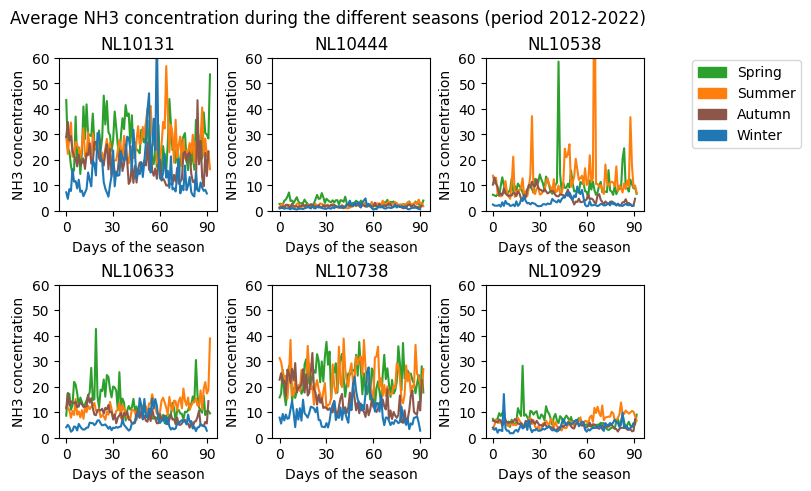

In [6]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

colors = [
    "tab:blue",
    "tab:orange",
    "tab:green",
    "tab:red",
    "tab:purple",
    "tab:brown"
]

yticks = [a * 10 for a in range(7)]
xticks = [b * 30 for b in range(4)]

fig, axes = plt.subplots(nrows=2, ncols=3, constrained_layout=True)
for c, ax in enumerate(axes.flat):

    ax.plot(spring_data[c]['NH3'], color="tab:green")
    ax.plot(summer_data[c]['NH3'], color="tab:orange")
    ax.plot(autumn_data[c]['NH3'], color="tab:brown")
    ax.plot(winter_data[c]['NH3'], color="tab:blue")
    ax.set_title(STATION_NAMES[c])
    ax.set_xlabel("Days of the season")
    ax.set_ylabel("NH3 concentration")
    ax.set_yticks(yticks)
    ax.set_xticks(xticks)
    ax.set_ybound(0, 60)
    
patches = [
    mpatches.Patch(color='tab:green', label='Spring'),
    mpatches.Patch(color='tab:orange', label='Summer'),
    mpatches.Patch(color='tab:brown', label='Autumn'),
    mpatches.Patch(color='tab:blue', label='Winter')
]

fig.suptitle("Average NH3 concentration during the different seasons (period 2012-2022)")
fig.legend(handles=patches, bbox_to_anchor=(1.25, 0.9))
plt.show()

In [21]:
# averages

print("---------- Average concentration per season ----------")
print("Period 2012-2022, metreological seasons\n")
print("Station\t\tSeason\tAverage concentration")

for f in range(len(data)):
    print(STATION_NAMES[f], end='')
    print("\t\tSpring\t"+str(spring_data[f]['NH3'].mean()))
    print("\t\tSummer\t"+str(summer_data[f]['NH3'].mean()))
    print("\t\tAutumn\t"+str(autumn_data[f]['NH3'].mean()))
    print("\t\tWinter\t"+str(winter_data[f]['NH3'].mean()))


---------- Average concentration per season ----------
Period 2012-2022, metreological seasons
Station		Season	Average concentration
NL10131		Spring	27.558537835142218
		Summer	26.183810392284002
		Autumn	18.56825769322591
		Winter	15.768182502883214
NL10444		Spring	3.237311028848741
		Summer	2.3462527843744563
		Autumn	1.9226060279765065
		Winter	1.482399327378303
NL10538		Spring	9.94757610494541
		Summer	12.369018993780747
		Autumn	5.776677930279968
		Winter	3.272226576610375
NL10633		Spring	13.507023550907919
		Summer	12.181087161190629
		Autumn	8.95907941662753
		Winter	5.852254666696568
NL10738		Spring	23.52132981151374
		Summer	22.790698685728227
		Autumn	14.688820285216897
		Winter	9.819093193218903
NL10929		Spring	7.026540317763962
		Summer	6.668501591117091
		Autumn	4.913633901302081
		Winter	4.328939634767696
